# Deep Learning Assignment  
**Name:** **MOhit Solanki**  
**Roll Number:** **23EJDAI025**   
**GitHub Repository : https://github.com/Mohit-Solanki-24/Deep-learning**    

This notebook performs:

1. Digit Classification using MNIST dataset  
2. Fashion Item Classification using Fashion-MNIST  

A simple but effective Neural Network is designed and evaluated using:
- Accuracy Plot  
- Loss Plot  
- Confusion Matrix  
- Classification Report  


### Import Required Libraries

We import TensorFlow/Keras for building neural networks,  
Matplotlib for visualization,  
and Sklearn for evaluation metrics.


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist, fashion_mnist

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Loading MNIST Dataset

MNIST contains 70,000 grayscale images of digits (0–9) of size 28x28.
We normalize pixel values to range 0–1 for better training.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


### Neural Network Architecture

- Flatten layer to convert 28x28 image into vector  
- Two Dense layers with ReLU  
- Dropout to avoid overfitting  
- Softmax output for 10 classes  


In [3]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model


In [4]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8538 - loss: 0.4852 - val_accuracy: 0.9632 - val_loss: 0.1200
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9586 - loss: 0.1389 - val_accuracy: 0.9673 - val_loss: 0.0963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - loss: 0.0999 - val_accuracy: 0.9738 - val_loss: 0.0806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9728 - loss: 0.0846 - val_accuracy: 0.9770 - val_loss: 0.0772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0756 - val_accuracy: 0.9750 - val_loss: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0677 - val_accuracy: 0.9759 - val_loss: 0.0787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9810 - loss: 0.0590 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0519 - 

### Accuracy Plot


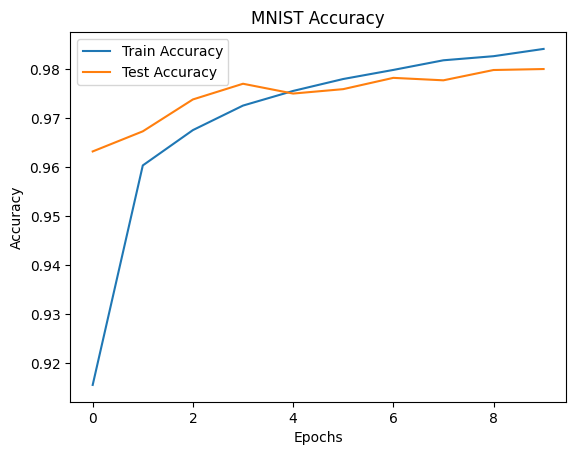

In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("MNIST Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Loss Plot


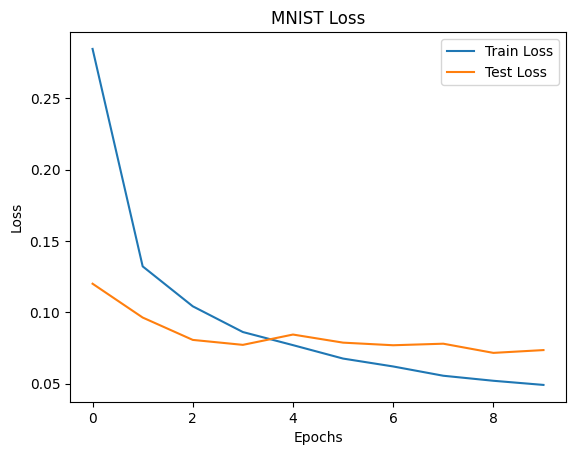

In [6]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("MNIST Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Confusion Matrix & Classification Report


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report - MNIST
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



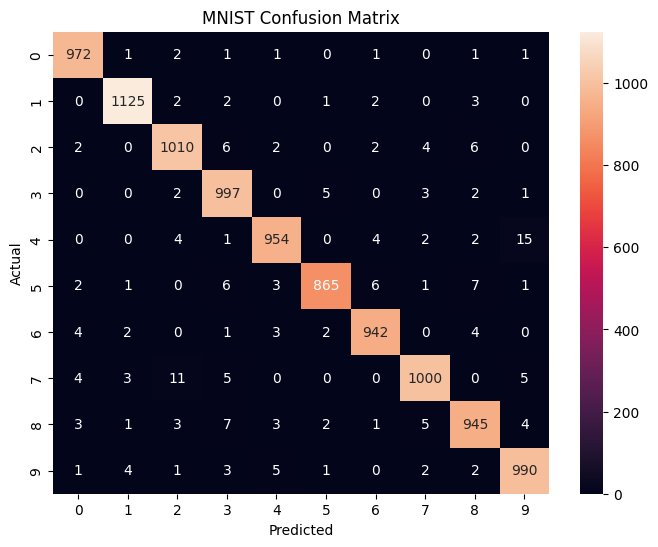

In [7]:
y_pred = np.argmax(model.predict(x_test), axis=1)

print("Classification Report - MNIST")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Fashion MNIST Dataset

Contains 10 classes:
T-shirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Boot


In [8]:
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = x_train_f / 255.0
x_test_f = x_test_f / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Model Architecture for Fashion MNIST
Same structure is used for fair comparison.


In [9]:
fashion_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

fashion_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training Fashion Model


In [10]:
history_f = fashion_model.fit(
    x_train_f, y_train_f,
    validation_data=(x_test_f, y_test_f),
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7554 - loss: 0.6922 - val_accuracy: 0.8413 - val_loss: 0.4339
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8521 - loss: 0.4084 - val_accuracy: 0.8599 - val_loss: 0.3963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8605 - loss: 0.3794 - val_accuracy: 0.8666 - val_loss: 0.3744
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8733 - loss: 0.3471 - val_accuracy: 0.8657 - val_loss: 0.3637
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8778 - loss: 0.3351 - val_accuracy: 0.8676 - val_loss: 0.3659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8829 - loss: 0.3189 - val_accuracy: 0.8794 - val_loss: 0.3430
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8871 - loss: 0.3071 - val_accuracy: 0.8737 - val_loss: 0.3498
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8913 - loss: 0.2990 

### Accuracy Plot – Fashion MNIST


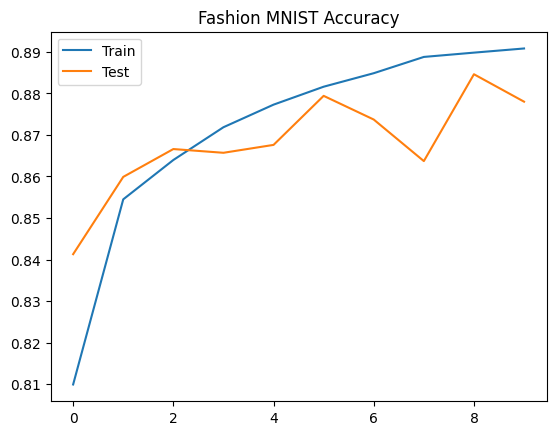

In [11]:
plt.plot(history_f.history['accuracy'], label='Train')
plt.plot(history_f.history['val_accuracy'], label='Test')
plt.title("Fashion MNIST Accuracy")
plt.legend()
plt.show()

### Loss Plot – Fashion MNIST


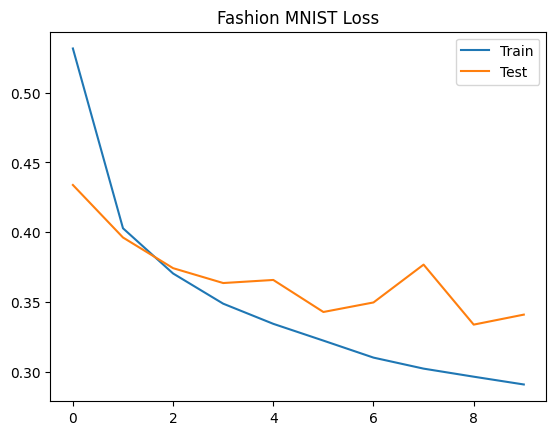

In [12]:
plt.plot(history_f.history['loss'], label='Train')
plt.plot(history_f.history['val_loss'], label='Test')
plt.title("Fashion MNIST Loss")
plt.legend()
plt.show()

### Confusion Matrix & Report – Fashion MNIST

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report - Fashion MNIST
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.84      0.79      1000
           3       0.86      0.90      0.88      1000
           4       0.79      0.79      0.79      1000
           5       0.95      0.97      0.96      1000
           6       0.74      0.64      0.69      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



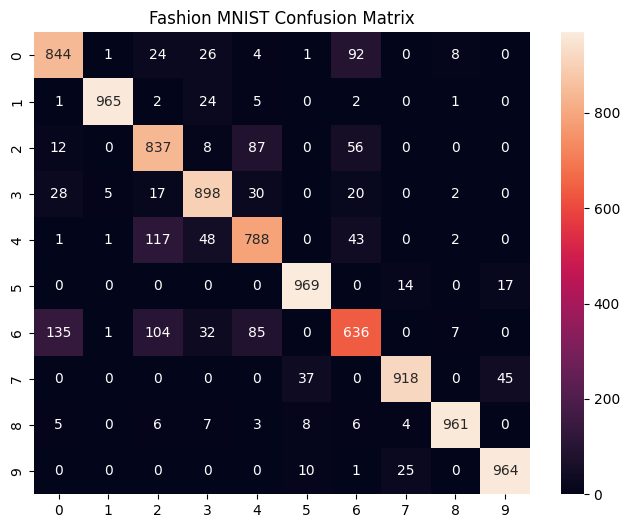

In [13]:
y_pred_f = np.argmax(fashion_model.predict(x_test_f), axis=1)

print("Classification Report - Fashion MNIST")
print(classification_report(y_test_f, y_pred_f))

cm_f = confusion_matrix(y_test_f, y_pred_f)

plt.figure(figsize=(8,6))
sns.heatmap(cm_f, annot=True, fmt='d')
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

## Conclusion

- Built Neural Network for MNIST and Fashion MNIST  
- Evaluated using:
  - Accuracy & Loss Plots  
  - Confusion Matrix  
  - Classification Report  

Model performs well on MNIST and reasonably on Fashion-MNIST which is more complex.
